In [1]:
import pandas as pd

data = pd.read_csv("gts-seoul.csv")

print(data.shape)

(32085, 14)


In [35]:
# for i in range(len(data)):
#     print(data["일시"][i][:10])
#     if i == 10:
#         break
    
data.loc[data['일시'].str.contains('2011-03')]

,지점,지점명,일시,습도,16 방위 풍향,풍속,강수량,현지기압,해면기압,변화량 기압,이슬점 온도,기온,최고 기온,최저 기온
1939,47108,서울,2011-03-01 00:00,94.3,29.0,5.0,2.0,1005.5,1016.3,1.4,-0.9,-0.1,NaN,-0.2
1940,47108,서울,2011-03-01 03:00,84.0,29.0,5.0,NaN,1004.2,1014.9,1.4,-1.2,1.2,NaN,NaN
1941,47108,서울,2011-03-01 06:00,60.0,29.0,8.0,NaN,1002.9,1013.5,1.4,-4.0,3.0,NaN,NaN
1942,47108,서울,2011-03-01 09:00,57.3,27.0,7.0,NaN,1003.1,1013.7,0.2,-4.7,2.9,NaN,NaN
1943,47108,서울,2011-03-01 12:00,55.0,29.0,5.0,0.0,1006.2,1017.0,3.3,-8.9,-1.0,3.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,47108,서울,2011-03-31 09:00,35.1,27.0,6.0,NaN,1010.7,1020.9,0.1,-1.6,13.5,NaN,NaN
2183,47108,서울,2011-03-31 12:00,50.1,27.0,7.0,NaN,1011.7,1022.2,1.3,-1.3,8.5,16.8,NaN
2184,47108,서울,2011-03-31 15:00,55.0,27.0,4.0,NaN,1012.1,1022.6,0.4,-1.5,6.9,NaN,NaN
2185,47108,서울,2011-03-31 18:00,66.3,32.0,2.0,NaN,1011.5,1022.1,0.5,0.0,5.8,NaN,NaN


In [41]:
# 문제 1. 데이터 불러오기 #

spec = data.loc[data["일시"] == "2011-03-21 06:00", ["습도", "풍속", "현지기압", "기온", "이슬점 온도"]]
spec["습도"] + spec["풍속"] + spec["현지기압"] + spec["기온"] + spec["이슬점 온도"]


# spec = data.loc[data["일시"] == "2011-03-21 06:00"]
# spec[["습도", "풍속", "현지기압", "기온", "이슬점 온도"]]

2101    1038.9
dtype: float64

In [3]:
# 문제 2. 데이터 전처리하기 #
data_process_before = data[["습도", "풍속", "현지기압", "기온", "이슬점 온도"]]


data_process_after = data_process_before.dropna(axis=0)

row = data_process_after.shape[0]
humidity_avg = (data_process_after["습도"]).mean()
max_windspeed = (data_process_after["풍속"]).max()
min_temparature = (data_process_after["기온"]).min()

ans = row + humidity_avg + max_windspeed + min_temparature

print(ans)

32128.421619683173


In [4]:
# 문제 3-1. 상관계수 구하기 #

X = data_process_after["이슬점 온도"]


a = X.corr(data["습도"])
b = X.corr(data["풍속"])
c = X.corr(data["현지기압"])
d = X.corr(data["기온"])

print(a + b + c + d)


# corr 직접 구현
# def corr(a, b):
#     a = a - a.mean()
#     b = b - b.mean()
    
#     return (a * b).sum() / ( (a*a).sum() * (b*b).sum()) ** 0.5 # a내적b  / |a||b|

# a = corr(data['습도'], data['이슬점 온도'])

1.1792022126818176


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


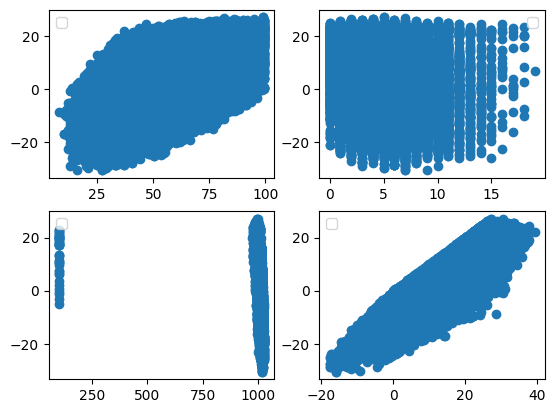

In [47]:
# 문제 3-2. 산점도(Scatter plot) 그리기 #

import matplotlib.pyplot as plt

x = data_process_after["습도"]
y = data_process_after["이슬점 온도"]
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.legend()

plt.subplot(2,2,2)
x = data_process_after["풍속"]
plt.scatter(x, y)
plt.legend()

plt.subplot(2,2,3)
x = data_process_after["현지기압"]
plt.scatter(x, y)
plt.legend()

plt.subplot(2,2,4)
x = data_process_after["기온"]
plt.scatter(x, y)
plt.legend()
#plt.show()



In [6]:
# 문제 3-3. 이상치 제거 #


df = data_process_after[data_process_after["현지기압"] >= 200]
# df = data_process_after[data_process_after["현지기압"] < 200 == False]

df.shape

(32027, 5)

In [7]:
# 문제 3-4. 상관계수 다시 계산 #


X = df["이슬점 온도"]


a = X.corr(df["습도"])
b = X.corr(df["풍속"])
c = X.corr(df["현지기압"])
d = X.corr(df["기온"])


print(a + b + c + d)

0.6187252015474827


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-20.445, 42.144999999999996, -33.375, 29.875)

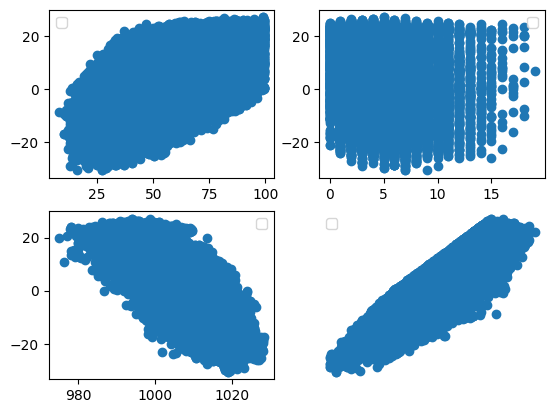

In [45]:
# 문제 3-5. 산점도(Scatter plot) 다시 그리기 #

# 문제 3-2. 산점도(Scatter plot) 그리기 #

import matplotlib.pyplot as plt

x = df["습도"]
y = df["이슬점 온도"]
plt.subplot(2,2,1)
plt.scatter(x, y)
plt.legend()

plt.subplot(2,2,2)
x = df["풍속"]
plt.scatter(x, y)
plt.legend()

plt.subplot(2,2,3)
x = df["현지기압"]
plt.scatter(x, y)
plt.legend()

plt.subplot(2,2,4)
x = df["기온"]
plt.scatter(x, y)
plt.legend()

plt.axis('off')




In [49]:
# 문제 4-1. 이슬점 온도 계산 공식 구하기 #

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch



# x = pd.DataFrame(df, columns=['습도', '풍속', '현지기압', '기온'])
# y = pd.DataFrame(df, columns=['이슬점 온도'])

# x = torch.tensor(x.values)
# y = torch.tensor(y.values)

# x = x.view(-1, 4)

x = df[['습도', '풍속', '현지기압', '기온']]
y = df[['이슬점 온도']]



lr = LinearRegression()
lr.fit(x, y)

print("W", lr.coef_, ", b", lr.intercept_)


y_pred = lr.predict(x)



W [[ 0.2676329  -0.03078923  0.00952646  0.92936961]] , b [-32.91662937]


In [10]:
# 문제 4-2. 이슬점 온도 계산 공식 구하기 #

mse = mean_squared_error(y, y_pred)
print("평균제곱오차:", mse)

평균제곱오차: 1.168514629572586


In [11]:
# Linear Regression

W = torch.zeros(4,1)
b = torch.zeros(1)

lr = 0.01 # learning rate

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.mm(x, W) + b
  cost = torch.mean((h - y) ** 2)
  
  cost.backward()
  with torch.no_grad():
    W = W - lr * W.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}'.format(epoch,
 cost.item(), W.squeeze(), b))
      
  
test_x = torch.randn((10, 4))  # Example test data
predicted_y = torch.mm(test_x, W) + b
print('Predicted values:', predicted_y.squeeze().detach().numpy())

TypeError: mm(): argument 'input' (position 1) must be Tensor, not DataFrame

In [ ]:
test = x*lr.coef_.squeeze()
test

,습도,풍속,현지기압,기온
0,18.849238,-0.106325,0.138025,23.118222
1,16.476420,-0.106325,0.137872,25.799936
2,13.250454,-0.106325,0.137651,28.204231
3,17.809464,-0.212650,0.137623,26.632192
4,21.222056,-0.141766,0.137803,24.320370
...,...,...,...,...
32080,17.516194,-0.389858,0.136915,20.066617
32081,22.341813,-0.177208,0.137290,17.477376
32082,22.635082,-0.248091,0.137498,17.384903
32083,22.901691,-0.141766,0.137567,17.015011


In [ ]:
# from sklearn.metrics import mean_squared_error
 
# mean_squared_error(test_value, predicted_value)